<a href="https://colab.research.google.com/github/sarajay19/AccidentsPrediction/blob/main/MiniProjectW5_AccidentsPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import SimpleRNN, Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Read the dataset

In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
100% 651M/653M [00:31<00:00, 25.8MB/s]
100% 653M/653M [00:31<00:00, 21.9MB/s]


In [ ]:
!unzip 'us-accidents.zip'

Archive:  us-accidents.zip
  inflating: US_Accidents_March23.csv  


In [ ]:
df = pd.read_csv('US_Accidents_March23.csv', nrows=100000)  #parse_dates=['Start_Time']
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


# Exploratory Data Analysis (EDA)

In [ ]:
df.shape

(100000, 46)

In [ ]:
df.columns.to_list()

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [ ]:
df.dtypes

,0
ID,object
Source,object
Severity,int64
Start_Time,object
End_Time,object
Start_Lat,float64
Start_Lng,float64
End_Lat,float64
End_Lng,float64
Distance(mi),float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,100000.000000,100000.000000,100000.000000,0.0,0.0,100000.000000,98409.000000,4322.000000,98144.000000,98708.000000,98154.000000,76180.000000,7368.000000
mean,2.448120,35.630369,-119.322756,NaN,NaN,0.011345,66.641262,48.845812,59.794170,29.961021,9.338639,8.044165,0.025786
std,0.499931,2.101259,3.663525,NaN,NaN,0.262244,12.703846,19.898270,23.184442,0.275672,1.885828,4.298926,0.051695
min,1.000000,32.542587,-123.813927,NaN,NaN,0.000000,3.200000,-8.400000,4.000000,2.980000,0.100000,0.000000,0.000000
25%,2.000000,33.957775,-121.828468,NaN,NaN,0.000000,57.900000,37.100000,43.000000,29.890000,10.000000,4.600000,0.000000
50%,2.000000,34.168579,-118.384232,NaN,NaN,0.000000,66.000000,42.500000,62.000000,29.970000,10.000000,6.900000,0.000000
75%,3.000000,37.776682,-117.916023,NaN,NaN,0.010000,75.000000,63.000000,78.000000,30.060000,10.000000,10.400000,0.030000
max,4.000000,41.428753,-81.550728,NaN,NaN,51.130000,114.100000,107.000000,100.000000,33.040000,80.000000,241.700000,0.550000


In [ ]:
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

{'ID': 100000,
 'Source': 2,
 'Start_Time': 98896,
 'End_Time': 96724,
 'Description': 71519,
 'Street': 9119,
 'City': 786,
 'County': 71,
 'State': 3,
 'Zipcode': 12002,
 'Country': 1,
 'Timezone': 3,
 'Airport_Code': 122,
 'Weather_Timestamp': 37247,
 'Wind_Direction': 25,
 'Weather_Condition': 44,
 'Sunrise_Sunset': 3,
 'Civil_Twilight': 3,
 'Nautical_Twilight': 3,
 'Astronomical_Twilight': 3}

In [ ]:
df.isna().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,100000
End_Lng,100000
Distance(mi),0


In [ ]:
# Calulate the percentage of the missing values
missing_per = df.isna().sum().sort_values(ascending = False) / len(df) * 100
missing_per

,0
End_Lat,100.000
End_Lng,100.000
Wind_Chill(F),95.678
Precipitation(in),92.632
Wind_Speed(mph),23.820
Humidity(%),1.856
Visibility(mi),1.846
Weather_Condition,1.604
Temperature(F),1.591
Pressure(in),1.292


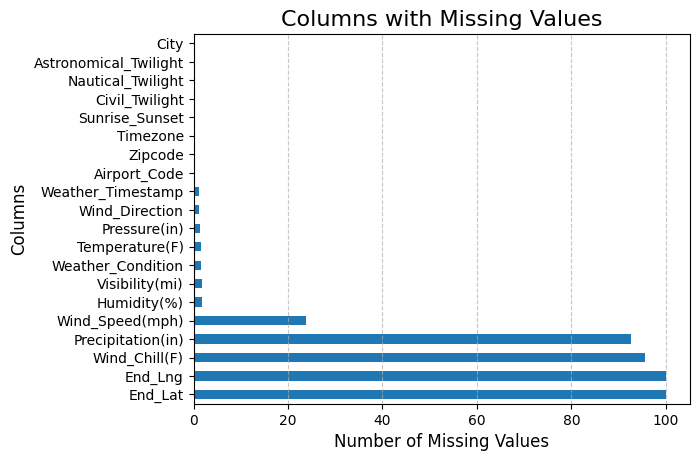

In [ ]:
# Displaying columns with missing values to see it clearly

missing_per[missing_per != 0].plot(kind="barh")

plt.title("Columns with Missing Values", fontsize=16)
plt.xlabel("Number of Missing Values", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

# Visualizations

Explore and understand the relations between the data by ***visualization***

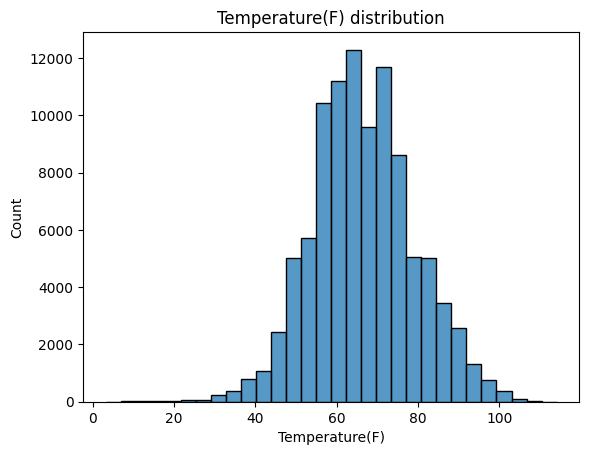

In [ ]:
sns.histplot(df['Temperature(F)'], bins=30)
plt.title('Temperature(F) distribution')
plt.show()

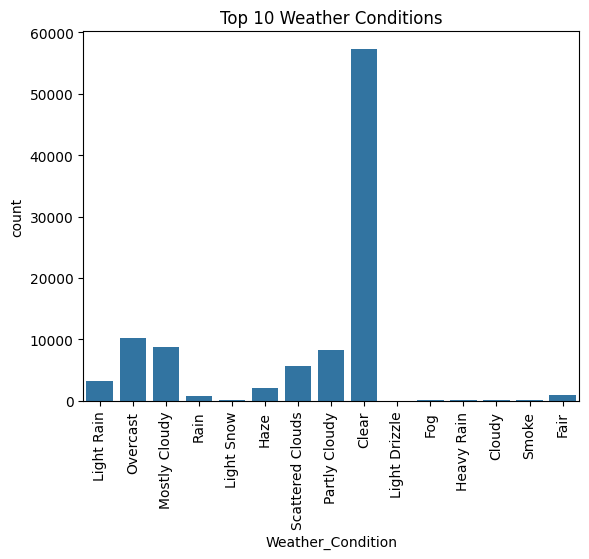

In [ ]:
top_conditions = df['Weather_Condition'].value_counts().nlargest(15).index
sns.countplot(x='Weather_Condition', data=df[df['Weather_Condition'].isin(top_conditions)])
plt.title('Top 10 Weather Conditions')
plt.xticks(rotation=90)
plt.show()

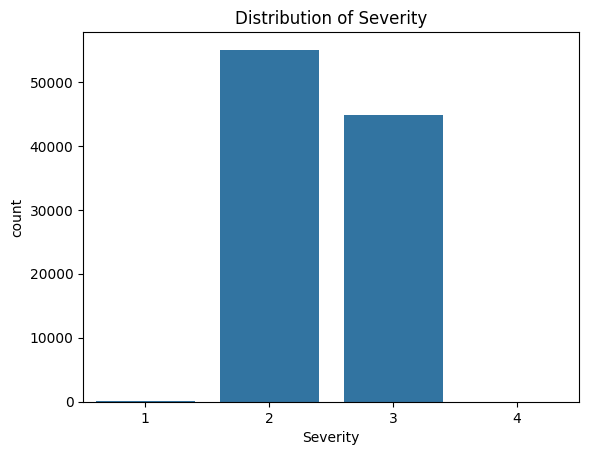

In [ ]:
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Severity')
plt.show()

# 1 = Very Low
# 2 = Low
# 3 = High
# 4 = Very Hifh

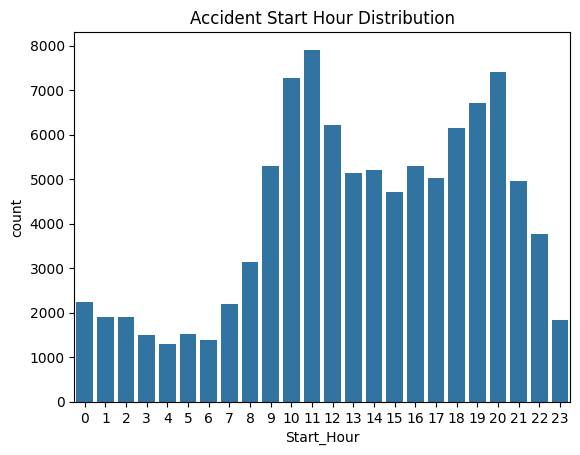

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Start_Hour'] = df['Start_Time'].dt.hour
sns.countplot(x='Start_Hour', data=df)
plt.title('Accident Start Hour Distribution')
plt.show()

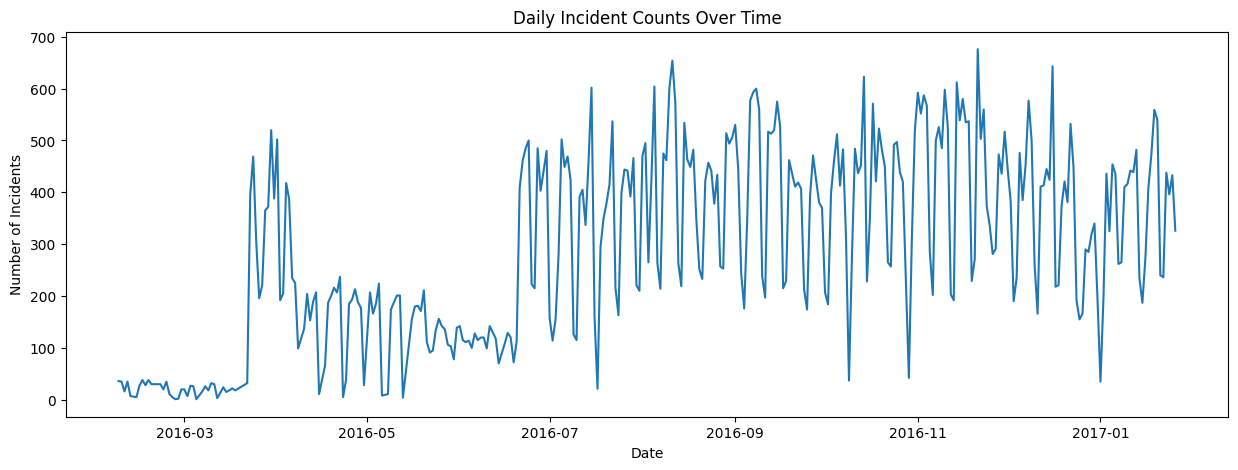

In [ ]:
# Count the number of accidents that grouped by date

df['Date'] = df['Start_Time'].dt.date
daily_counts = df.groupby('Date').size()

plt.figure(figsize=(15, 5))
daily_counts.plot()
plt.title('Daily Incident Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
# plt.xticks(rotation=45)
plt.show()

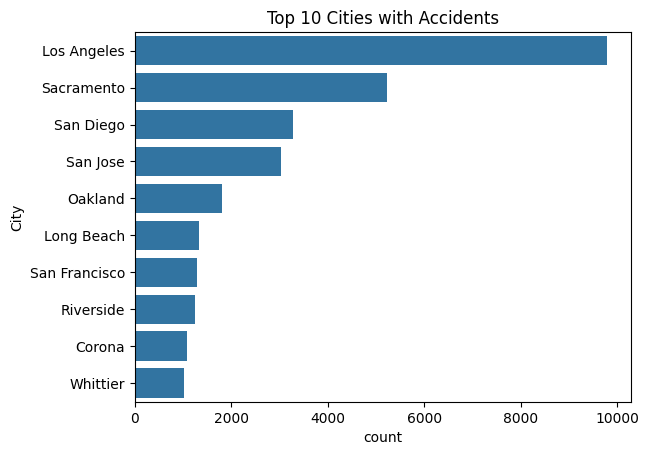

In [ ]:
sns.countplot(y='City', data=df, order=df['City'].value_counts().index[:10])
plt.title('Top 10 Cities with Accidents')
plt.show()

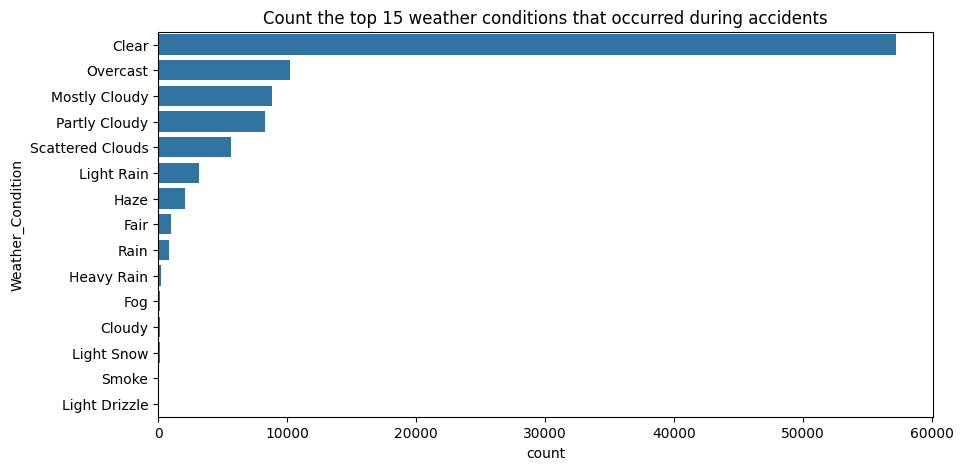

In [ ]:
# Count the number of accidents with the effect of weather condition

plt.figure(figsize=(10, 5))
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().nlargest(15).index)
plt.title('Count the top 15 weather conditions that occurred during accidents')
plt.show()

# Data Preprocessing



### 1.   Drop unnecessary columns



In [ ]:
# Selecting the unnecessary columns from the dataset

unneeded_columns = ['Source', 'Description', 'Street', 'Country', 'Zipcode', 'Airport_Code', 'End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)',
                     'Wind_Direction', 'Sunrise_Sunset', 'Nautical_Twilight', 'Civil_Twilight' ,'Astronomical_Twilight', 'Pressure(in)', 'State', 'Humidity(%)']

In [ ]:
# Take a samples of data to check before dropping

unneeded_columns_samples = df[unneeded_columns].sample(3)
print(unneeded_columns_samples)

        Source                                        Description  \
96045  Source2  #1 lane blocked due to accident on I-15 Northb...   
66227  Source2  Accident on I-5 Northbound at Exits 102 103 10...   
37408  Source2       Accident on Hamilton Ave at Winchester Blvd.   

                Street Country Zipcode Airport_Code  End_Lat  End_Lng  \
96045           I-15 N      US   92562         KF70      NaN      NaN   
66227            I-5 N      US   92705         KSNA      NaN      NaN   
37408  Winchester Blvd      US   95008         KSJC      NaN      NaN   

       Wind_Chill(F)  Precipitation(in) Wind_Direction Sunrise_Sunset  \
96045            NaN                NaN             SW            Day   
66227            NaN                NaN            SSW            Day   
37408            NaN                NaN            WNW            Day   

      Nautical_Twilight Civil_Twilight Astronomical_Twilight  Pressure(in)  \
96045               Day            Day                   Da

In [ ]:
# drop unnecessary columns

df = df.drop(unneeded_columns, axis=1)

In [ ]:
# Displaying the columns after dropping to check

df.columns.tolist()

['ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'City',
 'County',
 'Timezone',
 'Weather_Timestamp',
 'Temperature(F)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Start_Hour',
 'Date']

Save the data into meaningful variable for further analysis



In [ ]:
# Convert timestamps to datetime format

df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])


In [ ]:
# Select the relevant columns for further analysis

accident_data = df[['ID', 'Severity', 'Start_Time', 'City', 'Weather_Timestamp',
                     'Temperature(F)', 'Wind_Speed(mph)',
                      'Weather_Condition']]


### 2.   Handle Missing Values



In [ ]:
missing_values = accident_data.isnull().sum()
missing_values[missing_values > 0]

,0
City,1
Weather_Timestamp,1054
Temperature(F),1591
Wind_Speed(mph),23820
Weather_Condition,1604


In [ ]:
accident_data['Weather_Condition'] = accident_data['Weather_Condition'].fillna(method = 'bfill')

<ipython-input-29-5c40bdfd6e42>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  accident_data['Weather_Condition'] = accident_data['Weather_Condition'].fillna(method = 'bfill')
<ipython-input-29-5c40bdfd6e42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_data['Weather_Condition'] = accident_data['Weather_Condition'].fillna(method = 'bfill')


In [ ]:
accident_data['Wind_Speed(mph)'] = accident_data['Wind_Speed(mph)'].fillna(method = 'bfill')

<ipython-input-30-66063a2ceeda>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  accident_data['Wind_Speed(mph)'] = accident_data['Wind_Speed(mph)'].fillna(method = 'bfill')
<ipython-input-30-66063a2ceeda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_data['Wind_Speed(mph)'] = accident_data['Wind_Speed(mph)'].fillna(method = 'bfill')


In [ ]:
missing_values = accident_data.isnull().sum()
missing_values[missing_values > 0]

,0
City,1
Weather_Timestamp,1054
Temperature(F),1591


In [ ]:
accident_data=accident_data.dropna()

In [ ]:
accident_data.isnull().sum()

,0
ID,0
Severity,0
Start_Time,0
City,0
Weather_Timestamp,0
Temperature(F),0
Wind_Speed(mph),0
Weather_Condition,0


In [ ]:
accident_data.shape

(98408, 8)

In [ ]:
accident_data

,ID,Severity,Start_Time,City,Weather_Timestamp,Temperature(F),Wind_Speed(mph),Weather_Condition
0,A-1,3,2016-02-08 05:46:00,Dayton,2016-02-08 05:58:00,36.9,3.5,Light Rain
1,A-2,2,2016-02-08 06:07:59,Reynoldsburg,2016-02-08 05:51:00,37.9,3.5,Light Rain
2,A-3,2,2016-02-08 06:49:27,Williamsburg,2016-02-08 06:56:00,36.0,3.5,Overcast
3,A-4,3,2016-02-08 07:23:34,Dayton,2016-02-08 07:38:00,35.1,4.6,Mostly Cloudy
4,A-5,2,2016-02-08 07:39:07,Dayton,2016-02-08 07:53:00,36.0,3.5,Mostly Cloudy
...,...,...,...,...,...,...,...,...
99995,A-100002,3,2016-04-05 15:52:14,San Diego,2016-04-05 15:51:00,72.0,8.1,Mostly Cloudy
99996,A-100003,3,2016-04-05 15:57:10,Downey,2016-04-05 15:53:00,82.9,6.9,Clear
99997,A-100004,2,2016-04-05 16:02:16,Rancho Cucamonga,2016-04-05 15:53:00,91.0,6.9,Mostly Cloudy
99998,A-100005,2,2016-04-05 16:01:17,Riverside,2016-04-05 15:53:00,91.9,8.1,Mostly Cloudy


# Visualizing the Data after Pre-processing

In [ ]:
# Group by Weather Condition and Severity to count accidents
accident_counts = accident_data.groupby('Weather_Condition')['ID'].count().reset_index(name='Accident_Count')

In [ ]:
accident_counts

,Weather_Condition,Accident_Count
0,Blowing Dust / Windy,1
1,Blowing Sand,1
2,Clear,57297
3,Cloudy,143
4,Drizzle,30
5,Fair,1049
6,Fair / Windy,12
7,Fog,157
8,Hail,1
9,Haze,2086


In [ ]:
accident_counts.shape

(43, 2)

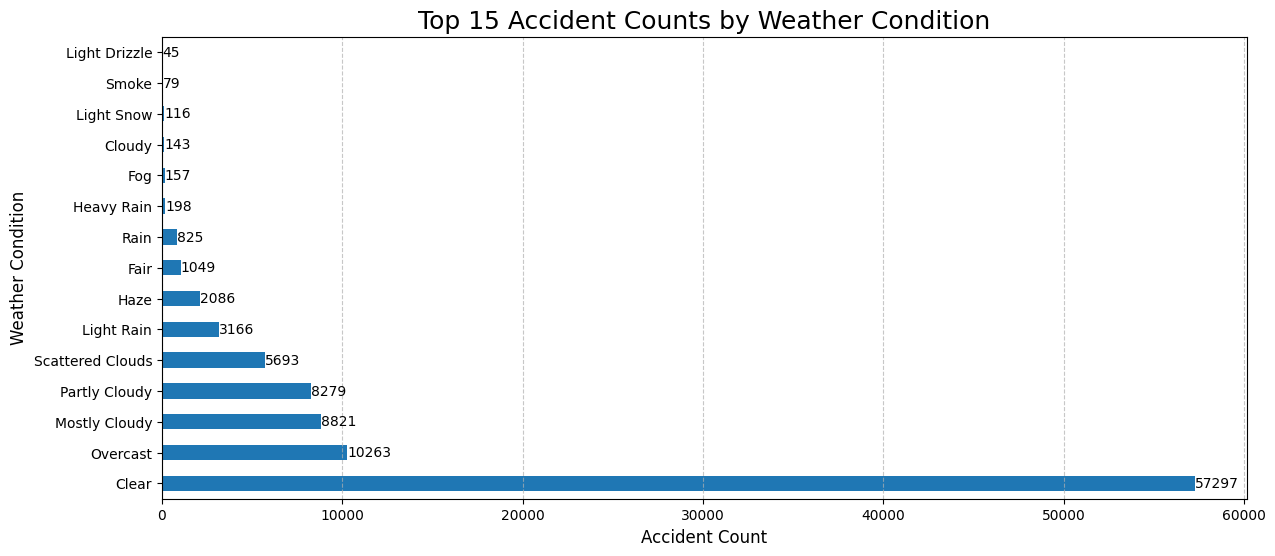

In [ ]:
# Same as the plot before but with sorted data

weather_counts = accident_counts.groupby('Weather_Condition')['Accident_Count'].sum().sort_values().nlargest(15)

plt.figure(figsize=(14, 6))
weather_counts.plot(kind='barh')

plt.title('Top 15 Accident Counts by Weather Condition', fontsize=18)
plt.xlabel('Accident Count', fontsize=12)
plt.ylabel('Weather Condition', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(weather_counts):
    plt.text(value, index, str(value), va='center', fontsize=10)

plt.show()

#Features Engineering

In [ ]:
# Year and Month Extracting from existing column 'Start_Time'

accident_data['Year'] = accident_data['Start_Time'].dt.year
accident_data['Month'] = accident_data['Start_Time'].dt.month

In [ ]:
accident_data

,ID,Severity,Start_Time,City,Weather_Timestamp,Temperature(F),Wind_Speed(mph),Weather_Condition,Year,Month
0,A-1,3,2016-02-08 05:46:00,Dayton,2016-02-08 05:58:00,36.9,3.5,Light Rain,2016,2
1,A-2,2,2016-02-08 06:07:59,Reynoldsburg,2016-02-08 05:51:00,37.9,3.5,Light Rain,2016,2
2,A-3,2,2016-02-08 06:49:27,Williamsburg,2016-02-08 06:56:00,36.0,3.5,Overcast,2016,2
3,A-4,3,2016-02-08 07:23:34,Dayton,2016-02-08 07:38:00,35.1,4.6,Mostly Cloudy,2016,2
4,A-5,2,2016-02-08 07:39:07,Dayton,2016-02-08 07:53:00,36.0,3.5,Mostly Cloudy,2016,2
...,...,...,...,...,...,...,...,...,...,...
99995,A-100002,3,2016-04-05 15:52:14,San Diego,2016-04-05 15:51:00,72.0,8.1,Mostly Cloudy,2016,4
99996,A-100003,3,2016-04-05 15:57:10,Downey,2016-04-05 15:53:00,82.9,6.9,Clear,2016,4
99997,A-100004,2,2016-04-05 16:02:16,Rancho Cucamonga,2016-04-05 15:53:00,91.0,6.9,Mostly Cloudy,2016,4
99998,A-100005,2,2016-04-05 16:01:17,Riverside,2016-04-05 15:53:00,91.9,8.1,Mostly Cloudy,2016,4


In [ ]:
monthly_accidents = accident_data.groupby(['Year', 'Month']).size().reset_index(name='Accident_Count')

In [ ]:
monthly_accidents

,Year,Month,Accident_Count
0,2016,2,425
1,2016,3,3503
2,2016,4,5370
3,2016,5,3745
4,2016,6,6219
5,2016,7,9953
6,2016,8,12737
7,2016,9,11933
8,2016,10,11344
9,2016,11,13326


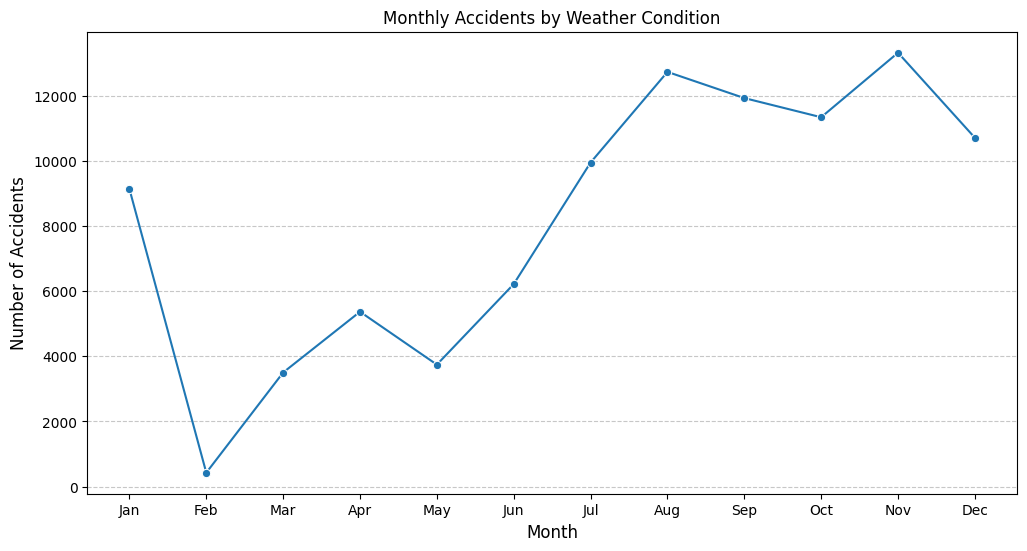

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_accidents, x='Month', y='Accident_Count', marker='o') #hue='Weather_Condition',
plt.title('Monthly Accidents by Weather Condition')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.legend(title='Weather Condition')
plt.show()


In [ ]:
# Ensure the DataFrame is sorted by Year and Month
monthly_accidents['Date'] = pd.to_datetime(monthly_accidents[['Year', 'Month']].assign(DAY=1))
monthly_accidents = monthly_accidents.sort_values('Date')

# Select only the Accident_Count for RNN
data = monthly_accidents['Accident_Count'].values.reshape(-1, 1)

In [ ]:
monthly_accidents

,Year,Month,Accident_Count,Date
0,2016,2,425,2016-02-01
1,2016,3,3503,2016-03-01
2,2016,4,5370,2016-04-01
3,2016,5,3745,2016-05-01
4,2016,6,6219,2016-06-01
5,2016,7,9953,2016-07-01
6,2016,8,12737,2016-08-01
7,2016,9,11933,2016-09-01
8,2016,10,11344,2016-10-01
9,2016,11,13326,2016-11-01


In [ ]:
data.shape

(12, 1)

In [ ]:
monthly_accidents.duplicated().sum()

0

In [ ]:
data

array([[  425],
       [ 3503],
       [ 5370],
       [ 3745],
       [ 6219],
       [ 9953],
       [12737],
       [11933],
       [11344],
       [13326],
       [10714],
       [ 9139]])

# Features Scaling

In [ ]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Prepare the data for the model

In [ ]:
# Create sequences for RNN
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Use the last 3 months to predict the next
X, y = create_dataset(data_normalized, time_step=3)

# Reshape X for RNN [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Data Splitting


*   80% Training set
*   20% Valdidation set



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display the sizes of the training and testing sets

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_val.shape)

Training Set Size: (6, 3, 1)
Testing Set Size: (2, 3, 1)


# Model Selection

*   **Recurrent Neural Networks (RNNs)**
*   **Long Short-term Memory (LSTM)**


Since our problem is **time series forecasting**, We did choose two sequence models to **predict the next sequence** of our data, and then compare their results to see the best performance.

### 1. RNN Model


In [ ]:
model = Sequential([
    layers.Input(shape=(X.shape[1], 1)),

    # 1st layer
    SimpleRNN(units=30, return_sequences=True),
    Dropout(0.2),

    # 2nd layer
    SimpleRNN(units=30, return_sequences=True),
    Dropout(0.2),

    # 3rd layer
    SimpleRNN(units=30, return_sequences=True),
    Dropout(0.2),

    # 4th layer
    SimpleRNN(units=30, return_sequences=True),
    Dropout(0.2),

    # 5th layer
    SimpleRNN(units=30),
    Dropout(0.2),

    # Output layer
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 3, 30)               │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 3, 30)               │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 3, 30)               │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 3, 30)               │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,311 (32.46 KB)

 Trainable params: 8,311 (32.46 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set the early stopping at 15 epochs, to prevent overfitting and ensure the model doesn't train longer than necessary.

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=37,
          verbose=1,
          callbacks= [early_stopping])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 1.7612 - val_loss: 0.7351
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9481 - val_loss: 0.2131
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 1.1669 - val_loss: 0.0169
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.1627 - val_loss: 0.0761
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.2000 - val_loss: 0.2698
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.5315 - val_loss: 0.4720
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.6287 - val_loss: 0.5402
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.3244 - val_loss: 0.6320
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1764 - val_loss: 0.6673
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 1.0631 - val_loss: 0.6078
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.4553 - val_loss: 0.4985
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.2487 - val_loss: 0.

In [ ]:
val_loss = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Loss (MSE): {val_loss}')

Validation Loss (MSE): 0.016928402706980705


In [ ]:
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step


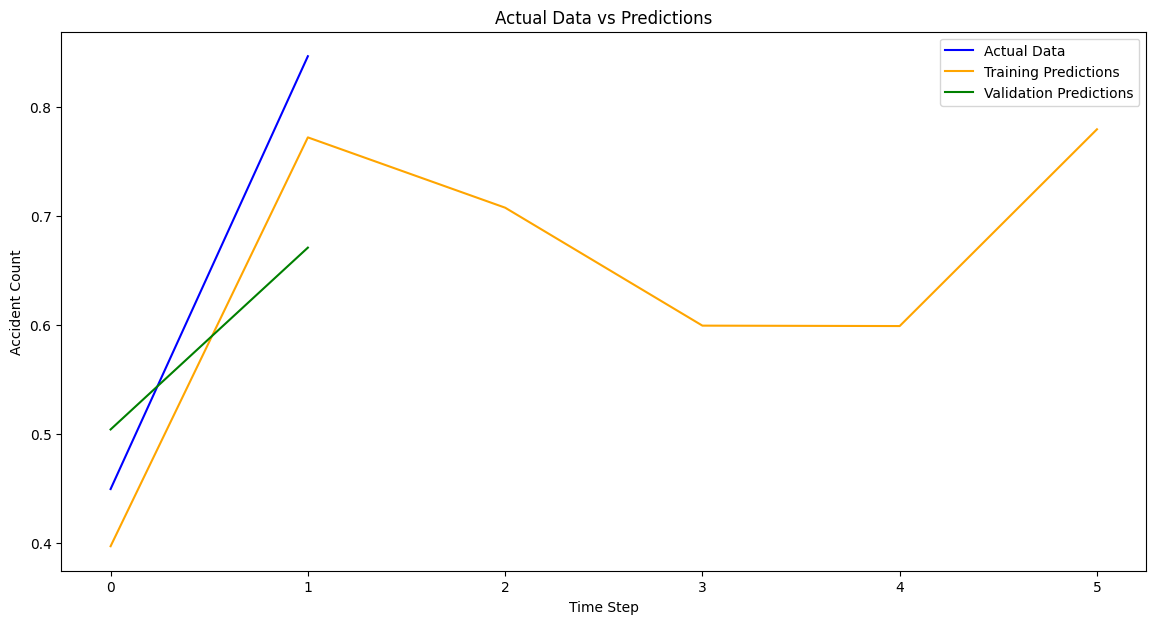

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(y_val, label='Actual Data', color='blue')

plt.plot(train_predictions, label='Training Predictions', color='orange')

plt.plot(val_predictions, label='Validation Predictions', color='green')

plt.title('Actual Data vs Predictions')
plt.xlabel('Time Step')
plt.ylabel('Accident Count')
plt.legend()
plt.show()

In [ ]:
last_months_values = monthly_accidents[['Year', 'Month', 'Accident_Count']].tail(3)

print("Last few months' values:")
print(last_months_values)

Last few months' values:
    Year  Month  Accident_Count
9   2016     11           13326
10  2016     12           10714
11  2017      1            9139


In [ ]:
# Prepare the last few months for prediction
last_months = data_normalized[-3:].reshape(1, 3, 1)  # Reshape for RNN input
predicted = model.predict(last_months)

# Inverse transform to get the original scale
predicted_accidents = scaler.inverse_transform(predicted)

print(f'Predicted number of accidents for next month: {predicted_accidents[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted number of accidents for next month: 10842.52734375


### 2. LSTM Model

In [ ]:
model = Sequential([
    layers.Input(shape=(X.shape[1], 1)),

    # 1st layer
    LSTM(units=30, return_sequences=True),
    Dropout(0.2),

    # 2nd layer
    LSTM(units=30, return_sequences=True),
    Dropout(0.2),

    # 3rd layer
    LSTM(units=30, return_sequences=True),
    Dropout(0.2),

    # 4th layer
    LSTM(units=30, return_sequences=True),
    Dropout(0.2),

    # 5th layer
    LSTM(units=30),
    Dropout(0.2),

    # Output layer
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 30)               │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 3, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 3, 30)               │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 3, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 3, 30)               │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 3, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 3, 30)               │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 3, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30)                  │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,151 (129.50 KB)

 Trainable params: 33,151 (129.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=37,
          verbose=1,
          callbacks= [early_stopping])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - loss: 0.6594 - val_loss: 0.4510
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6496 - val_loss: 0.4427
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.6404 - val_loss: 0.4343
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.6284 - val_loss: 0.4256
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.6180 - val_loss: 0.4167
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.6118 - val_loss: 0.4075
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.6008 - val_loss: 0.3979
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.5816 - val_loss: 0.3879
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.5745 - val_loss: 0.3775
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.5528 - val_loss: 0.3667
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.5536 - val_loss: 0.3554
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.5356 - val_loss: 0.343

In [ ]:
val_loss = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Loss (MSE): {val_loss}')

Validation Loss (MSE): 0.02720390260219574


In [ ]:
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


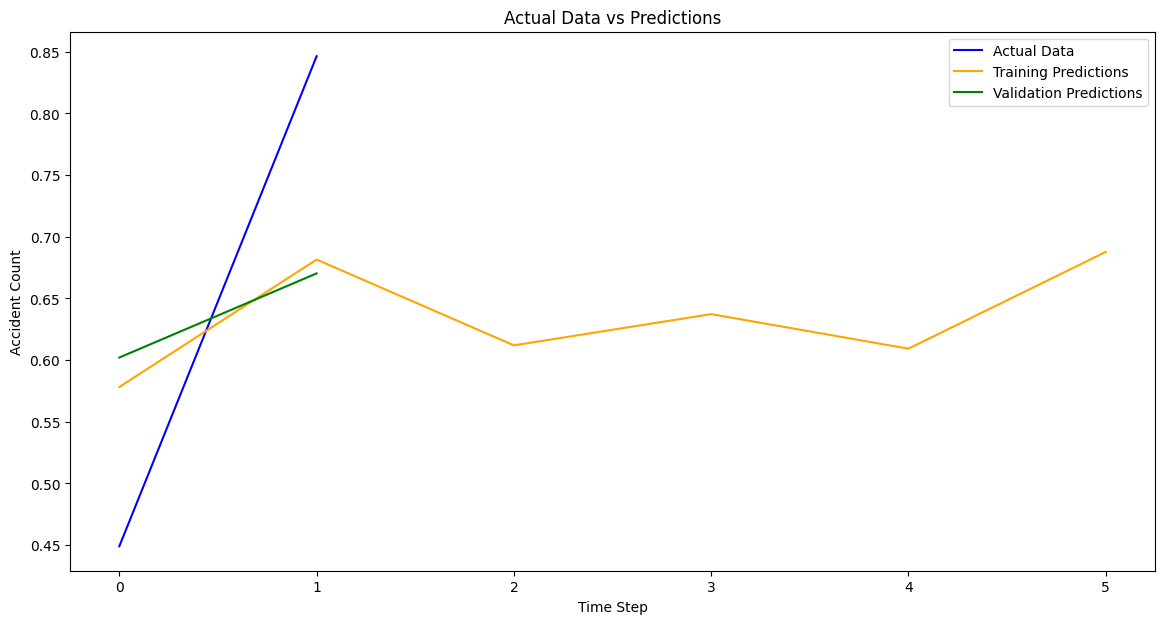

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(y_val, label='Actual Data', color='blue')

plt.plot(train_predictions, label='Training Predictions', color='orange')

plt.plot(val_predictions, label='Validation Predictions', color='green')

plt.title('Actual Data vs Predictions')
plt.xlabel('Time Step')
plt.ylabel('Accident Count')
plt.legend()
plt.show()

In [ ]:
# Prepare the last few months for prediction
last_months = data_normalized[-3:].reshape(1, 3, 1)  # Reshape for RNN input
predicted = model.predict(last_months)

# Inverse transform to get the original scale
predicted_accidents = scaler.inverse_transform(predicted)

print(f'Predicted number of accidents for next month: {predicted_accidents[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted number of accidents for next month: 9293.328125
